In [6]:
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install plotly
import plotly.express as px
plt.style.use('seaborn')
# define all the palettes
palette_1 = sns.color_palette('Set1')
palette_2 = sns.color_palette('Paired', 10)
palette_3 = sns.color_palette('PuOr', 10)
palette_4 = sns.color_palette('Pastel1', 10)
palette_5 = sns.color_palette('Accent', 10)
palette_6 = sns.color_palette('Set3')



import pandas as pd


pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)




In [7]:
df = pd.read_csv('data/processed_data_train.csv')
df

,FACUL_NUM,DIVISION_NUM,weighted_hazard,SEGMENT_LOB,UWYEAR,CT_PERIOD,MAINOCCUPANCY,SECTOR,BUSINESSUNIT,UWCENTER,SCOPE_PERILS,SUBSIDIARY,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,XXX_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,PD_price(M),BI_time(Days),Both_price(M),PD_percent_loss (%),COVER_BI,GEO_MARKET_SEGMENT,UWYEAR_label,INCEPTION_month,uw_index,financial_ratio
0,02F062851,4,0.021181,Ppty Non Energy,2019,12,Precious Metals Mines,BS Energy,BS Energy,EMEA,All Risks,XXX REASSURANCE,Excess of Loss,EU,Mining - Hard Rock,Loss of profit,12.0,4.332659e+08,1.811347e+08,6.144006e+08,1,0.0,3.585254e+08,6598627.50,0.09990,51556.785174,0.000000,0.0,0.090927,0.090927,Standard,Average,Average,Average,Average,0.879817,1.000000,1.987311e+08,0.0,0.9,30.0,0.0,0.0,True,Latin America,1,4,0.009348,1.076494
1,11F008861,1,0.493284,Ppty Non Energy,2017,12,Precious Metals Mines,BS Energy,BS Energy,LAC,All Risks,XXX CANADA,Quota-Share,EU,Mining - Hard Rock,Loss of profit,12.0,5.374779e+08,1.635938e+08,7.010717e+08,3,0.0,1.858218e+08,0.00,0.07500,101618.137904,0.000000,0.0,0.118414,0.118414,Standard,Average,Average,Average,Average,0.929109,1.000000,1.860507e+08,0.0,0.5,30.0,0.0,0.0,True,Latin America,1,4,0.001416,1.159407
2,02F062851,4,0.032325,Ppty Non Energy,2018,12,Precious Metals Mines,BS Energy,BS Energy,EMEA,All Risks,XXX REASSURANCE,Excess of Loss,EU,Mining - Hard Rock,Loss of profit,12.0,4.179461e+08,2.398087e+08,6.577548e+08,1,0.0,3.432446e+08,6317385.45,0.09990,45815.493131,0.000000,0.0,0.131827,0.131827,Standard,Average,Average,Average,Average,0.842318,1.000000,2.566551e+08,0.0,0.8,30.0,0.0,0.0,True,Latin America,1,3,0.041996,1.042942
3,FA0020462,1,0.542983,Ppty Non Energy,2018,12,Precious Metals Mines,BS Energy,BS Energy,LAC,All Risks,XXX CANADA,Quota-Share,EU,Mining - Hard Rock,Loss of profit,12.0,4.899790e+08,2.272838e+08,7.172627e+08,3,0.0,1.684636e+08,0.00,0.02500,35547.127725,0.000000,0.0,0.106521,0.106521,Standard,Average,Average,Average,Average,0.842318,1.000000,2.290373e+08,0.0,0.4,30.0,0.0,0.0,True,Latin America,1,6,0.239188,1.042942
4,02F062851,4,0.020401,Ppty Non Energy,2017,12,Precious Metals Mines,BS Energy,BS Energy,EMEA,All Risks,XXX REASSURANCE,Excess of Loss,EU,Mining - Hard Rock,Loss of profit,12.0,4.531088e+08,2.533740e+08,7.064828e+08,1,0.0,3.786119e+08,6968317.50,0.09998,69669.238365,0.000000,0.0,0.137920,0.137920,Standard,Average,Average,Average,Average,0.929109,1.000000,2.353414e+08,0.0,0.9,30.0,0.0,0.0,True,Latin America,1,3,0.083991,1.159407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,FA0002277,1,0.318948,Ppty Non Energy,2018,12,Pulp & paper,BS CP,BS Property,LAC,All Risks,XXX ASIA PACIFIC,Quota-Share,EU,Pulp & paper,Loss of profit,0.0,1.002686e+08,0.000000e+00,1.002686e+08,1,0.0,8.626910e+07,0.00,0.05000,5176.146155,0.000000,0.0,0.131695,0.131695,Standard,Average,Average,Non applicable,Average,0.000037,0.000044,6.813797e+07,741400.0,0.0,0.0,0.0,0.0,False,Emerging Asia,1,10,0.523304,1.110821
5188,FA0002277,1,0.318948,Ppty Non Energy,2019,12,Pulp & paper,BS CP,BS Property,LAC,All Risks,XXX ASIA PACIFIC,Quota-Share,EU,Pulp & paper,Loss of profit,0.0,8.029707e+07,0.000000e+00,8.029707e+07,1,0.0,8.172402e+07,0.00,0.05000,5516.371364,0.000000,0.0,0.147355,0.147355,Standard,Average,Average,Non applicable,Average,0.000038,0.000043,6.938787e+07,755000.0,0.0,0.0,0.0,0.0,False,Emerging Asia,1,10,0.101061,1.072877
5189,FA0059911,1,0.124366,Ppty Non Energy,2019,12,Pulp & paper,BS CP,BS Property,LAC,All Risks,XXX ASIA PACIFIC,Quota-Share,EU,Pulp & paper,Loss of profit,12.0,2.349111e+07,2.639451e+06,2.613056e+07,2,0.0,2.085166e+07,0.00,0.05000,3162.590188,0.0000

In [23]:
mean_tiv = df.groupby(by="GEO_MARKET_SEGMENT")['TOTALINSUREDVALUE'].mean().to_frame()
mean_tiv

,TOTALINSUREDVALUE
GEO_MARKET_SEGMENT,
Africa,5.337838e+09
Central and Eastern Europe,4.822134e+09
Emerging Asia,1.253557e+09
Latin America,1.556849e+09
Mature Asia,4.441591e+09
Middle East,5.867054e+09
North America,5.933858e+09
Others,3.004957e+09
Western Europe,1.029862e+10


In [16]:
mean_premium = df.groupby(by="GEO_MARKET_SEGMENT")['PREMIUM'].mean().to_frame()
mean_premium

,PREMIUM
GEO_MARKET_SEGMENT,
Africa,240705.838580
Central and Eastern Europe,177861.531334
Emerging Asia,69540.038207
Latin America,137231.971860
Mature Asia,161159.175743
Middle East,217992.769448
North America,211912.784987
Others,163893.383325
Western Europe,245880.203667


In [17]:
mean_uwindex = df.groupby(by="GEO_MARKET_SEGMENT")['uw_index'].mean().to_frame()
mean_uwindex

,uw_index
GEO_MARKET_SEGMENT,
Africa,0.669034
Central and Eastern Europe,0.229385
Emerging Asia,0.492308
Latin America,0.255952
Mature Asia,0.721169
Middle East,2.122667
North America,0.895034
Others,0.209986
Western Europe,0.584949


In [50]:
mean_df = mean_premium.join([mean_uwindex, mean_tiv])
mean_df

,PREMIUM,uw_index,TOTALINSUREDVALUE
GEO_MARKET_SEGMENT,,,
Africa,240705.838580,0.669034,5.337838e+09
Central and Eastern Europe,177861.531334,0.229385,4.822134e+09
Emerging Asia,69540.038207,0.492308,1.253557e+09
Latin America,137231.971860,0.255952,1.556849e+09
Mature Asia,161159.175743,0.721169,4.441591e+09
Middle East,217992.769448,2.122667,5.867054e+09
North America,211912.784987,0.895034,5.933858e+09
Others,163893.383325,0.209986,3.004957e+09
Western Europe,245880.203667,0.584949,1.029862e+10


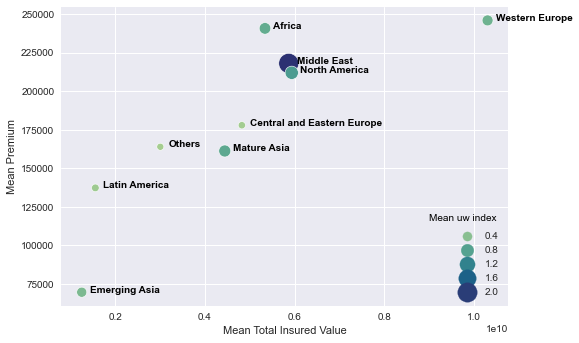

In [125]:

plt.figure()
p1 = sns.scatterplot(data=mean_df, x="TOTALINSUREDVALUE", y="PREMIUM", 
                     hue="uw_index", 
                     palette='crest',
                     size="uw_index",
                     sizes=(50, 400))

for line in range(0,mean_df.shape[0]):
     p1.text(mean_df.TOTALINSUREDVALUE[line]+1.8e8, mean_df.PREMIUM[line], 
     mean_df.index[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')


p1.text(0.9e10, 116000,'Mean uw index', horizontalalignment='left', 
     size='medium', color='black')



plt.xlabel('Mean Total Insured Value')

plt.ylabel('Mean Premium')

plt.legend(loc='lower right')



plt.savefig('market.png',dpi=900,bbox_inches='tight')

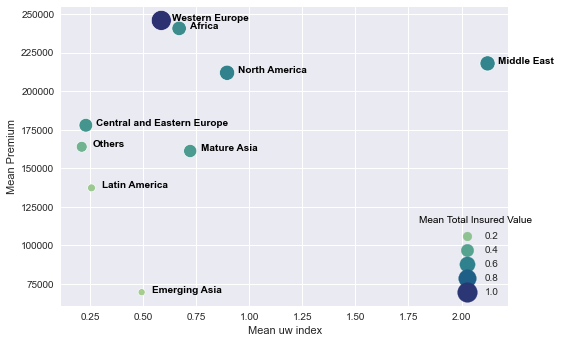

In [136]:

plt.figure()
p1 = sns.scatterplot(data=mean_df, x="uw_index", y="PREMIUM", 
                     hue="TOTALINSUREDVALUE", 
                     palette='crest',
                     size="TOTALINSUREDVALUE",
                     sizes=(50, 400))

for line in range(0,mean_df.shape[0]):
     p1.text(mean_df.uw_index[line]+0.05, mean_df.PREMIUM[line], 
     mean_df.index[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')




plt.xlabel('Mean uw index')

plt.ylabel('Mean Premium')



p1.text(1.8, 115000,'Mean Total Insured Value', horizontalalignment='left', 
     size='medium', color='black')

plt.legend(loc='lower right')



plt.savefig('market.png',dpi=300,bbox_inches='tight')